In [1]:
from datascience import *
import numpy as np
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
#Get all data from pokeon csv
raw = Table.read_table('pokemon.csv')

In [3]:
#Drop some of the columns that are less relevant, i.e., weakness against water types, etc.
national_pokedex = raw.drop(range(1,19)).drop(["base_egg_steps","base_happiness","experience_growth","japanese_name"])
national_pokedex

abilities,attack,base_total,capture_rate,classfication,defense,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
"['Overgrow', 'Chlorophyll']",49,318,45,Seed Pokémon,49,0.7,45,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",62,405,45,Seed Pokémon,63,1,60,Ivysaur,88.1,2,80,80,60,grass,poison,13,1,0
"['Overgrow', 'Chlorophyll']",100,625,45,Seed Pokémon,123,2,80,Venusaur,88.1,3,122,120,80,grass,poison,100,1,0
"['Blaze', 'Solar Power']",52,309,45,Lizard Pokémon,43,0.6,39,Charmander,88.1,4,60,50,65,fire,nan,8.5,1,0
"['Blaze', 'Solar Power']",64,405,45,Flame Pokémon,58,1.1,58,Charmeleon,88.1,5,80,65,80,fire,nan,19,1,0
"['Blaze', 'Solar Power']",104,634,45,Flame Pokémon,78,1.7,78,Charizard,88.1,6,159,115,100,fire,flying,90.5,1,0
"['Torrent', 'Rain Dish']",48,314,45,Tiny Turtle Pokémon,65,0.5,44,Squirtle,88.1,7,50,64,43,water,nan,9,1,0
"['Torrent', 'Rain Dish']",63,405,45,Turtle Pokémon,80,1,59,Wartortle,88.1,8,65,80,58,water,nan,22.5,1,0
"['Torrent', 'Rain Dish']",103,630,45,Shellfish Pokémon,120,1.6,79,Blastoise,88.1,9,135,115,78,water,nan,85.5,1,0
"['Shield Dust', 'Run Away']",30,195,255,Worm Pokémon,35,0.3,45,Caterpie,50,10,20,20,45,bug,nan,2.9,1,0


In [4]:
#Define a function to simplify the classfication of each pokemon by dropping the end "Pokemon" part
def simplify_classfication(poke_classfication):
    """Simplifies classfication of each pokemon by dropping the ' Pokemon' part at the end """
    return poke_classfication.replace(' Pokémon','')

#Apply function to all elments of the classification column, save to an array of simplified classfications
simplified_classfication = national_pokedex.apply(simplify_classfication, "classfication")

#Drop original classfication column and add simplified one
national_pokedex=national_pokedex.drop("classfication").with_column("classfication", simplified_classfication)
national_pokedex

abilities,attack,base_total,capture_rate,defense,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,classfication
"['Overgrow', 'Chlorophyll']",49,318,45,49,0.7,45,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0,Seed
"['Overgrow', 'Chlorophyll']",62,405,45,63,1,60,Ivysaur,88.1,2,80,80,60,grass,poison,13,1,0,Seed
"['Overgrow', 'Chlorophyll']",100,625,45,123,2,80,Venusaur,88.1,3,122,120,80,grass,poison,100,1,0,Seed
"['Blaze', 'Solar Power']",52,309,45,43,0.6,39,Charmander,88.1,4,60,50,65,fire,nan,8.5,1,0,Lizard
"['Blaze', 'Solar Power']",64,405,45,58,1.1,58,Charmeleon,88.1,5,80,65,80,fire,nan,19,1,0,Flame
"['Blaze', 'Solar Power']",104,634,45,78,1.7,78,Charizard,88.1,6,159,115,100,fire,flying,90.5,1,0,Flame
"['Torrent', 'Rain Dish']",48,314,45,65,0.5,44,Squirtle,88.1,7,50,64,43,water,nan,9,1,0,Tiny Turtle
"['Torrent', 'Rain Dish']",63,405,45,80,1,59,Wartortle,88.1,8,65,80,58,water,nan,22.5,1,0,Turtle
"['Torrent', 'Rain Dish']",103,630,45,120,1.6,79,Blastoise,88.1,9,135,115,78,water,nan,85.5,1,0,Shellfish
"['Shield Dust', 'Run Away']",30,195,255,35,0.3,45,Caterpie,50,10,20,20,45,bug,nan,2.9,1,0,Worm


In [5]:
def percent_attack(tot_attack, tot):
    """Converts total attacking stats of each pokemon (Speed + Physical + Special Attack) as a percentage of its total stats"""
    return np.round(tot_attack/tot*100,2)

#Apply previous function to national pokedex
all_percent_attack = percent_attack(national_pokedex.column("attack")+national_pokedex.column("sp_attack")+national_pokedex.column("speed"),
               national_pokedex.column("base_total"))

#Add as column to national pokedex
national_pokedex = national_pokedex.with_column("Attacking Stats %", all_percent_attack)

#What are the 10 most offensively-minded pokemon?
national_pokedex.sort("Attacking Stats %", descending = True).take(np.arange(0,10))

abilities,attack,base_total,capture_rate,defense,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,classfication,Attacking Stats %
['Beast Boost'],137,570,255,37,1.8,71,Pheromosa,nan,795,137,37,151,bug,fighting,25,7,1,Lissome,74.56
"['Rough Skin', 'Speed Boost']",90,305,225,20,0.8,45,Carvanha,50,318,65,20,65,water,dark,20.8,3,0,Savage,72.13
['Levitate'],35,310,190,30,1.3,30,Gastly,50,92,100,35,80,ghost,poison,0.1,1,0,Gas,69.35
"['Synchronize', 'Inner Focus', 'Magic Guard']",20,310,200,15,0.9,25,Abra,75.4,63,105,55,90,psychic,nan,19.5,1,0,Psi,69.35
['Stance Change'],150,520,45,50,1.7,60,Aegislash,50,681,150,50,60,steel,ghost,53,6,0,Royal Sword,69.23
"['Sand Veil', 'Arena Trap', 'Sand Force', 'Sand Veil', ' ...",55,265,255,30,nan,10,Diglett,50,50,35,45,90,ground,ground,nan,1,0,Mole,67.92
['Wonder Guard'],90,236,45,45,0.8,1,Shedinja,nan,292,30,30,40,bug,ghost,1.2,3,0,Shed,67.8
"['Pressure', 'Super Luck', 'Justified']",150,565,30,60,1.2,65,Absol,50,359,115,60,115,dark,nan,47,3,0,Disaster,67.26
"['Torrent', 'Protean', 'Battle Bond']",145,640,45,67,1.5,72,Greninja,88.1,658,153,71,132,water,dark,40,6,0,Ninja,67.19
"['Static', 'Lightningrod']",40,205,190,15,0.3,20,Pichu,50,172,35,35,60,electric,nan,2,2,0,Tiny Mouse,65.85


In [6]:
#Create array of pokemon types
types = ["normal","fire","fighting","water","flying","grass","poison","electric","ground","psychic","rock","ice","bug","dragon",
         "ghost","dark","steel","fairy"]

#array to hold average base total of each type
average_bst = []

#Calculate average base total of each type
for poke_type in types:
    #Count the number of pokemon of type depending on whether they are listed under column type1 or type2
    n1 = national_pokedex.where("type1", are.equal_to(poke_type)).num_rows
    n2 = national_pokedex.where("type2", are.equal_to(poke_type)).num_rows
    #Calculate total base stats of pokemon depending on whether they are listed under column type1 or type2
    total_bst1 = sum(national_pokedex.where("type1", are.equal_to(poke_type)).column("base_total"))
    total_bst2 = sum(national_pokedex.where("type2", are.equal_to(poke_type)).column("base_total"))
    #Calculate average bst for all pokemon of type regardless of whether they are listed under column type1 or type2
    #Format with 2 decimal points or we will get foating point representation error where we have 453.57999999999 for example
    #This changs entries to a string, so necessary to change them back to floats afterwards
    average_bst.append(float("{0:.2f}".format((total_bst1 + total_bst2)/(n1 + n2),2))) 

#Create table with pokemon type and its average base total
avg_bst_type = Table().with_column("Type",types).with_column("Average BST", average_bst)
avg_bst_type.sort("Average BST", descending = True).show()

Type,Average BST
dragon,513
steel,493.67
psychic,463.79
fighting,456.58
fire,453.58
dark,447.74
ice,447.13
rock,446.98
ghost,444.8
flying,441.73


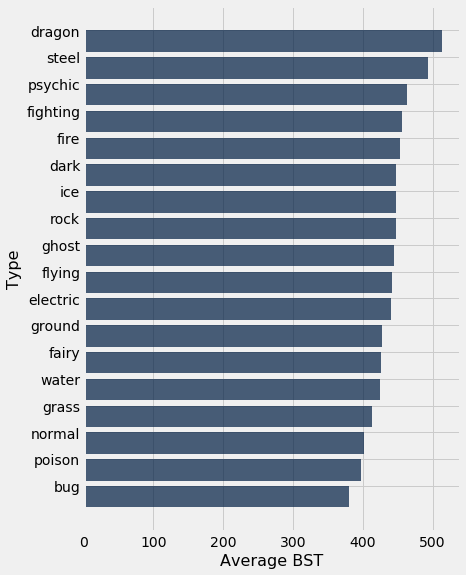

In [7]:
#Create bar chart to see average BST for each type, sorted in descending order
avg_bst_type.sort("Average BST", descending = True).barh("Type","Average BST")

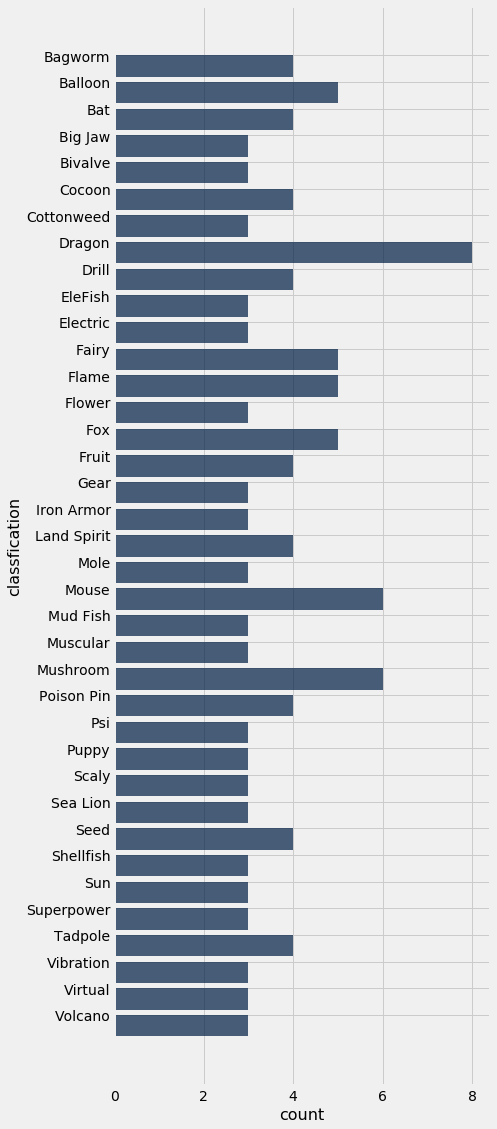

In [8]:
#Group pokemon by classfication (only take those that occur at least 3 times) 
#Note that the above process could have been simplifed by simply using this group method!
common_classfication_pokedex = national_pokedex.group("classfication").where("count",lambda x: x > 2)
common_classfication_pokedex.barh("classfication")

In [9]:
#Find average of each column after grouping by generation, ignoring NaN's so using np.nanmean instead of np.average
gen_averages = national_pokedex.group("generation",np.nanmean)

#Drop columns without numeric values (average would be meaningless)
gen_averages = gen_averages.drop("abilities nanmean").drop("name nanmean").drop("type1 nanmean").drop("type2 nanmean").drop("classfication nanmean").drop("capture_rate nanmean")
gen_averages

generation,attack nanmean,base_total nanmean,defense nanmean,height_m nanmean,hp nanmean,percentage_male nanmean,pokedex_number nanmean,sp_attack nanmean,sp_defense nanmean,speed nanmean,weight_kg nanmean,is_legendary nanmean,Attacking Stats % nanmean
1,74.5298,416.252,70.0795,1.24135,64.3444,55.9819,76,69.404,67.7417,70.1523,45.8278,0.0331126,51.3514
2,69.96,413.18,71.79,1.163,70.98,54.012,201.5,65.4,73.44,61.61,49.105,0.06,47.9217
3,77.1852,420.022,72.637,1.22963,65.6667,54.0555,319,71.563,69.3926,63.5778,67.0778,0.0740741,50.1346
4,82.6729,451.178,76.1682,1.13364,73.1028,56.8,440,74.6355,74.5234,70.0748,76.885,0.121495,49.9875
5,80.5577,427.038,71.9615,1.03205,70.3141,56.4236,571.5,69.9744,67.7115,66.5192,52.4026,0.0833333,50.5948
6,76.5278,437.611,73.5556,1.09296,71.1111,54.7046,685.5,76.5694,73.1944,66.6528,52.2254,0.0833333,49.9049
7,84.6375,448.163,78.0125,1.28734,70.575,52.2068,761.5,75.25,75.65,64.0375,98.3,0.2125,49.9548


In [11]:
#Number of legendary and non-legendary pokemon in each generation in a pivot table
national_pokedex.pivot("generation","is_legendary")

is_legendary,1,2,3,4,5,6,7
0,146,94,125,94,143,66,63
1,5,6,10,13,13,6,17


In [12]:
#Create two seperate tables with the type depending on entry in type1 or type2 
first_types = national_pokedex.drop("type2").relabeled("type1","type")
#Note this second table only contains pokemon who have a second type, i.e., type 2 isn't missing
second_types = national_pokedex.where("type2", lambda x: x !="nan").drop("type1").relabeled("type2", "type")

#Add second types table as additinal rows to first types table
all_types = first_types.with_row(second_types)
all_types

abilities,attack,base_total,capture_rate,defense,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary,classfication,Attacking Stats %
"['Overgrow', 'Chlorophyll']",49,318,45,49,0.7,45,Bulbasaur,88.1,1,65,65,45,grass,6.9,1,0,Seed,50
"['Overgrow', 'Chlorophyll']",62,405,45,63,1,60,Ivysaur,88.1,2,80,80,60,grass,13,1,0,Seed,49.88
"['Overgrow', 'Chlorophyll']",100,625,45,123,2,80,Venusaur,88.1,3,122,120,80,grass,100,1,0,Seed,48.32
"['Blaze', 'Solar Power']",52,309,45,43,0.6,39,Charmander,88.1,4,60,50,65,fire,8.5,1,0,Lizard,57.28
"['Blaze', 'Solar Power']",64,405,45,58,1.1,58,Charmeleon,88.1,5,80,65,80,fire,19,1,0,Flame,55.31
"['Blaze', 'Solar Power']",104,634,45,78,1.7,78,Charizard,88.1,6,159,115,100,fire,90.5,1,0,Flame,57.26
"['Torrent', 'Rain Dish']",48,314,45,65,0.5,44,Squirtle,88.1,7,50,64,43,water,9,1,0,Tiny Turtle,44.9
"['Torrent', 'Rain Dish']",63,405,45,80,1,59,Wartortle,88.1,8,65,80,58,water,22.5,1,0,Turtle,45.93
"['Torrent', 'Rain Dish']",103,630,45,120,1.6,79,Blastoise,88.1,9,135,115,78,water,85.5,1,0,Shellfish,50.16
"['Shield Dust', 'Run Away']",30,195,255,35,0.3,45,Caterpie,50,10,20,20,45,bug,2.9,1,0,Worm,48.72


In [13]:
#Counts number of pokemon of each type in each generation
all_types.pivot("type","generation")

generation,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
1,12,4,3,10,5,8,13,19,3,14,16,9,22,35,14,11,2,32
2,10,6,1,8,8,3,10,19,1,10,10,5,15,4,10,7,4,18
3,14,10,9,4,5,7,6,12,6,17,13,6,18,5,20,12,9,28
4,9,7,6,7,2,7,5,14,8,15,10,6,17,8,9,7,10,14
5,18,16,10,11,2,15,16,18,9,20,11,7,17,7,15,10,12,17
6,3,5,9,3,13,4,8,8,8,9,2,4,8,2,6,8,4,9
7,11,2,6,5,12,9,7,8,6,13,4,1,12,5,8,4,5,13


In [14]:
#Average base total stat of pokemon of each type in each generation
all_types.pivot("type","generation",values = "base_total", collect = np.mean)

generation,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
1,352.917,349,440,449.5,394.2,424.375,460.923,466.526,438.333,408.071,392.812,458.222,391.091,392.914,478.286,428.636,395,422.312
2,415.5,498.333,540,398.75,312.25,421.667,448.3,421.789,435,399.3,392,353,391.6,406.25,458.6,452.143,535,420.778
3,341.143,431.3,561.111,420,352.8,428,446.667,465,386,394.118,434.385,448.333,372.389,402.4,456.95,454.167,496.667,412
4,357,486.857,575,449.857,427.5,465.286,477.6,420.643,503.875,455.6,484,495.5,433.235,402.875,483.667,434.286,514,441.357
5,416.667,412.188,513.5,448.818,380,473.8,456.375,445.667,394.667,408.8,431.636,465.714,412.059,380.857,423.8,439.3,462.583,423.706
6,274.667,517,468.556,400.333,487.385,468.25,450.875,441.25,448.125,415.667,565.5,425.25,382,407,467.5,471.5,440.75,435
7,417.364,550,476.667,495,485.75,478.444,433,423.875,500.5,412.077,421.25,478,431.25,434,511.875,459.25,571,432.923


In [15]:
#Name of pokemon of highest base total stat of each type in each generation [TO-DO]